### Reporte Inicial y Análisis Exploratorio de Datos (EDA)


### 1) Cargar librerias y archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# 1. Cargar el archivo especificando el separador como punto y coma
df_2020 = pd.read_csv('data\CP_2020.csv', sep=';')

# 2. Ver las columnas disponibles
print("COLUMNAS EN EL DATASET:")
print("-" * 50)
for i, columna in enumerate(df_2020.columns, 1):
    print(f"{i}. {columna}")

# 3. Información básica del dataset
print("\nINFORMACIÓN BÁSICA:")
print("-" * 50)
print(df_2020.info())

# 4. Primeras filas para ver la estructura
print("\nPRIMERAS FILAS:")
print("-" * 50)
print(df_2020.head())

COLUMNAS EN EL DATASET:
--------------------------------------------------
1. Código Proceso
2. Descripción compra
3. Fecha_Publicación Jerarquía - Fecha Publicación
4. Fecha Adjudicación Jerarquía - Fecha Adjudicación
5. CPC N9
6. Descripción CPC N9
7. Tipo Contratación
8. Ruc Entidad
9. Nombre Entidad
10. Provincia Entidad
11. Canton Entidad
12. Ruc Proveedor
13. Nombre Proveedor
14. Presupuesto
15. Valor adjudicado

INFORMACIÓN BÁSICA:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219051 entries, 0 to 219050
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Código Proceso                                     219051 non-null  object
 1   Descripción compra                                 219051 non-null  object
 2   Fecha_Publicación Jerarquía - Fecha Publicación    219051 non-null  ob

In [3]:
# Mostrar las columnas del DataFrame
print("\nCOLUMNAS DEL DATASET:")
print("-" * 50)
print("\nNombre de columnas:")
print(df_2020.columns.tolist())

print("\nInformación del DataFrame:")
print(df_2020.info())



COLUMNAS DEL DATASET:
--------------------------------------------------

Nombre de columnas:
['Código Proceso', 'Descripción compra', 'Fecha_Publicación Jerarquía - Fecha Publicación', 'Fecha Adjudicación Jerarquía - Fecha Adjudicación', 'CPC N9', 'Descripción CPC N9', 'Tipo Contratación', 'Ruc Entidad', 'Nombre Entidad', 'Provincia Entidad', 'Canton Entidad', 'Ruc Proveedor', 'Nombre Proveedor', 'Presupuesto', 'Valor adjudicado']

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219051 entries, 0 to 219050
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Código Proceso                                     219051 non-null  object
 1   Descripción compra                                 219051 non-null  object
 2   Fecha_Publicación Jerarquía - Fecha Publicación    219051 non-null  object
 3   Fecha Adjudicación 

### 2) Visualización de las columnas

In [5]:
# Reiniciando el EDA desde cero
print("1. VISUALIZACIÓN DE TODAS LAS COLUMNAS")
print("-" * 50)

# Mostrar todas las columnas del DataFrame
print("\nColumnas en el dataset:")
print("\nTotal de columnas:", len(df_2020.columns))
print("\nLista de columnas:")
for i, columna in enumerate(df_2020.columns, 1):
    print(f"{i}. {columna}")

# Información básica del DataFrame
print("\nInformación básica del DataFrame:")
print(df_2020.info())

# Primeras filas del DataFrame con todas las columnas
print("\nPrimeras filas del DataFrame:")
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)        # No truncar el ancho de la visualización
print(df_2020.head())

# Resumen estadístico básico
print("\nResumen estadístico básico:")
print(df_2020.describe(include='all'))

# Tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df_2020.dtypes)

# Valores nulos por columna
print("\nValores nulos por columna:")
nulos = df_2020.isnull().sum()
porcentaje_nulos = (df_2020.isnull().sum() / len(df_2020)) * 100
resumen_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje Nulos': porcentaje_nulos
}).sort_values('Valores Nulos', ascending=False)
print(resumen_nulos)


1. VISUALIZACIÓN DE TODAS LAS COLUMNAS
--------------------------------------------------

Columnas en el dataset:

Total de columnas: 15

Lista de columnas:
1. Código Proceso
2. Descripción compra
3. Fecha_Publicación Jerarquía - Fecha Publicación
4. Fecha Adjudicación Jerarquía - Fecha Adjudicación
5. CPC N9
6. Descripción CPC N9
7. Tipo Contratación
8. Ruc Entidad
9. Nombre Entidad
10. Provincia Entidad
11. Canton Entidad
12. Ruc Proveedor
13. Nombre Proveedor
14. Presupuesto
15. Valor adjudicado

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219051 entries, 0 to 219050
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Código Proceso                                     219051 non-null  object
 1   Descripción compra                                 219051 non-null  object
 2   Fecha_Publicación Jerarq

In [6]:
# Obtener el número total de columnas
num_columnas = len(df_2020.columns)
print(f"\nEl dataset tiene un total de {num_columnas} columnas")

# Obtener las dimensiones del DataFrame
print("\nDimensiones del DataFrame (filas x columnas):")
print(f"Shape: {df_2020.shape}")
print(f"Total de registros: {df_2020.shape[0]:,}")
print(f"Total de variables: {df_2020.shape[1]}")




El dataset tiene un total de 15 columnas

Dimensiones del DataFrame (filas x columnas):
Shape: (219051, 15)
Total de registros: 219,051
Total de variables: 15


### 3) Conversión de columnas no numéricas expresadas en 
Valores monetarios en números, convertir datos en número flotante y estadísticas descriptivas


In [7]:
%matplotlib inline

# Cargar el archivo
df_2020 = pd.read_csv('CP_2020.csv', sep=';')

# Verificar valores originales
print("Valores originales (primeros 5):")
print(df_2020[['Presupuesto', 'Valor adjudicado']].head())

# Convertir columnas monetarias a numérico
df_2020['Presupuesto'] = df_2020['Presupuesto'].str.replace('$', '').str.replace(',', '.').astype(float)
df_2020['Valor adjudicado'] = df_2020['Valor adjudicado'].str.replace('$', '').str.replace(',', '.').astype(float)

# Configurar visualización sin notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Verificar la conversión
print("\nValores convertidos (primeros 5):")
print(df_2020[['Presupuesto', 'Valor adjudicado']].head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_2020[['Presupuesto', 'Valor adjudicado']].describe())

# Valores más bajos y más altos
print("\nValores más bajos (Top 5):")
print(df_2020.nsmallest(5, 'Presupuesto')[['Presupuesto', 'Valor adjudicado']])

print("\nValores más altos (Top 5):")
print(df_2020.nlargest(5, 'Presupuesto')[['Presupuesto', 'Valor adjudicado']])

Valores originales (primeros 5):
          Presupuesto    Valor adjudicado
0  188340,75000000000  178864,29687500000
1   16098,56000000000   16098,55957031250
2  471077,98780000000  461678,43750000000
3   12008,32850000000   12008,32812500000
4       2,00000000000       2,00000000000

Valores convertidos (primeros 5):
   Presupuesto  Valor adjudicado
0    188340.75         178864.30
1     16098.56          16098.56
2    471077.99         461678.44
3     12008.33          12008.33
4         2.00              2.00

Estadísticas descriptivas:
       Presupuesto  Valor adjudicado
count    219051.00         219051.00
mean      21651.37          20254.58
std      286610.10         266089.42
min           0.03              0.03
25%          12.00             12.00
50%          71.10             71.10
75%        1106.76           1106.35
max    49804954.50       45680000.00

Valores más bajos (Top 5):
        Presupuesto  Valor adjudicado
5654           0.03              0.03
113296         0.

### 4) Búsqueda de valores NaN y/o reemplazar por valores adecuados.

In [8]:
# Verificar valores NaN en las columnas importantes
nan_presupuesto = df_2020['Presupuesto'].isna().sum()
nan_valor_adjudicado = df_2020['Valor adjudicado'].isna().sum()

print(f"Valores NaN en 'Presupuesto': {nan_presupuesto}")
print(f"Valores NaN en 'Valor adjudicado': {nan_valor_adjudicado}")

# Mostrar filas con NaN en las columnas importantes
print("\nFilas con NaN en 'Presupuesto' o 'Valor adjudicado':")
print(df_2020[df_2020['Presupuesto'].isna() | df_2020['Valor adjudicado'].isna()])

Valores NaN en 'Presupuesto': 0
Valores NaN en 'Valor adjudicado': 0

Filas con NaN en 'Presupuesto' o 'Valor adjudicado':
Empty DataFrame
Columns: [Código Proceso, Descripción compra, Fecha_Publicación Jerarquía - Fecha Publicación, Fecha Adjudicación Jerarquía - Fecha Adjudicación, CPC N9, Descripción CPC N9, Tipo Contratación, Ruc Entidad, Nombre Entidad, Provincia Entidad, Canton Entidad, Ruc Proveedor, Nombre Proveedor, Presupuesto, Valor adjudicado]
Index: []


### 5) Verificación de cuantos casos en porcentaje de las columnas 'Presupuesto' y 'Valor Asignado' 
Coinciden y en qué casos difieren


Análisis de casos:
--------------------------------------------------
Total de casos: 219051
Casos iguales (verdes): 189734 (86.62%)
Casos diferentes (rojos): 29317 (13.38%)


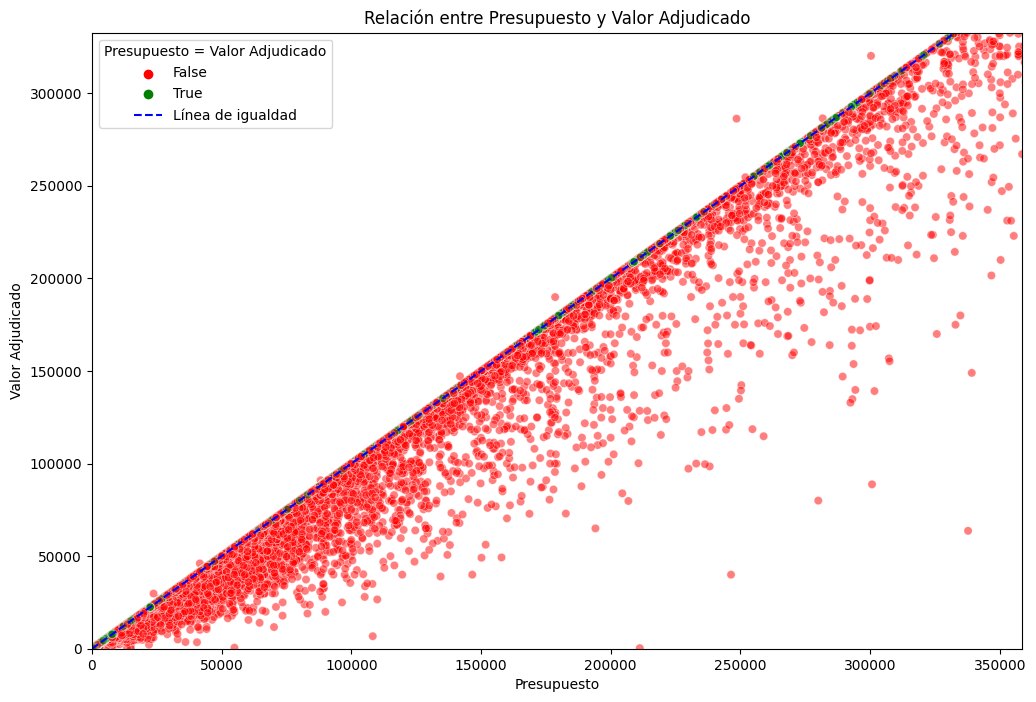


Estadísticas de las diferencias:
count    219051.00
mean       1396.78
std       35640.45
min     -978299.85
25%           0.00
50%           0.00
75%           0.00
max     8458065.89
Name: Diferencia, dtype: float64


In [10]:
# Cargar y preparar datos
df_2020 = pd.read_csv('CP_2020.csv', sep=';')

# Convertir columnas monetarias a numérico
df_2020['Presupuesto'] = df_2020['Presupuesto'].str.replace('$', '').str.replace(',', '.').astype(float)
df_2020['Valor adjudicado'] = df_2020['Valor adjudicado'].str.replace('$', '').str.replace(',', '.').astype(float)

# Contar casos iguales y diferentes de manera directa
iguales = (df_2020['Presupuesto'] == df_2020['Valor adjudicado']).sum()
diferentes = len(df_2020) - iguales
total = len(df_2020)

print("Análisis de casos:")
print("-" * 50)
print(f"Total de casos: {total}")
print(f"Casos iguales (verdes): {iguales} ({(iguales/total)*100:.2f}%)")
print(f"Casos diferentes (rojos): {diferentes} ({(diferentes/total)*100:.2f}%)")

# Crear columna para la visualización
df_2020['Es_igual'] = (df_2020['Presupuesto'] == df_2020['Valor adjudicado'])

# Crear el scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_2020, 
                x='Presupuesto', 
                y='Valor adjudicado',
                hue='Es_igual',
                palette=['red', 'green'],
                alpha=0.5)

# Añadir línea de referencia
max_value = max(df_2020['Presupuesto'].max(), df_2020['Valor adjudicado'].max())
plt.plot([0, max_value], [0, max_value], 'b--', label='Línea de igualdad')

plt.title('Relación entre Presupuesto y Valor Adjudicado')
plt.xlabel('Presupuesto')
plt.ylabel('Valor Adjudicado')
plt.legend(title='Presupuesto = Valor Adjudicado')

# Ajustar los límites para mejor visualización
plt.xlim(0, df_2020['Presupuesto'].quantile(0.99))
plt.ylim(0, df_2020['Valor adjudicado'].quantile(0.99))

plt.show()

# Calcular estadísticas de las diferencias
df_2020['Diferencia'] = df_2020['Presupuesto'] - df_2020['Valor adjudicado']
print("\nEstadísticas de las diferencias:")
print(df_2020['Diferencia'].describe())

### 6) Comparación en número de casos donde el Valor Asignado es mayor, igual y menor que el presupuesto a la obra pública.

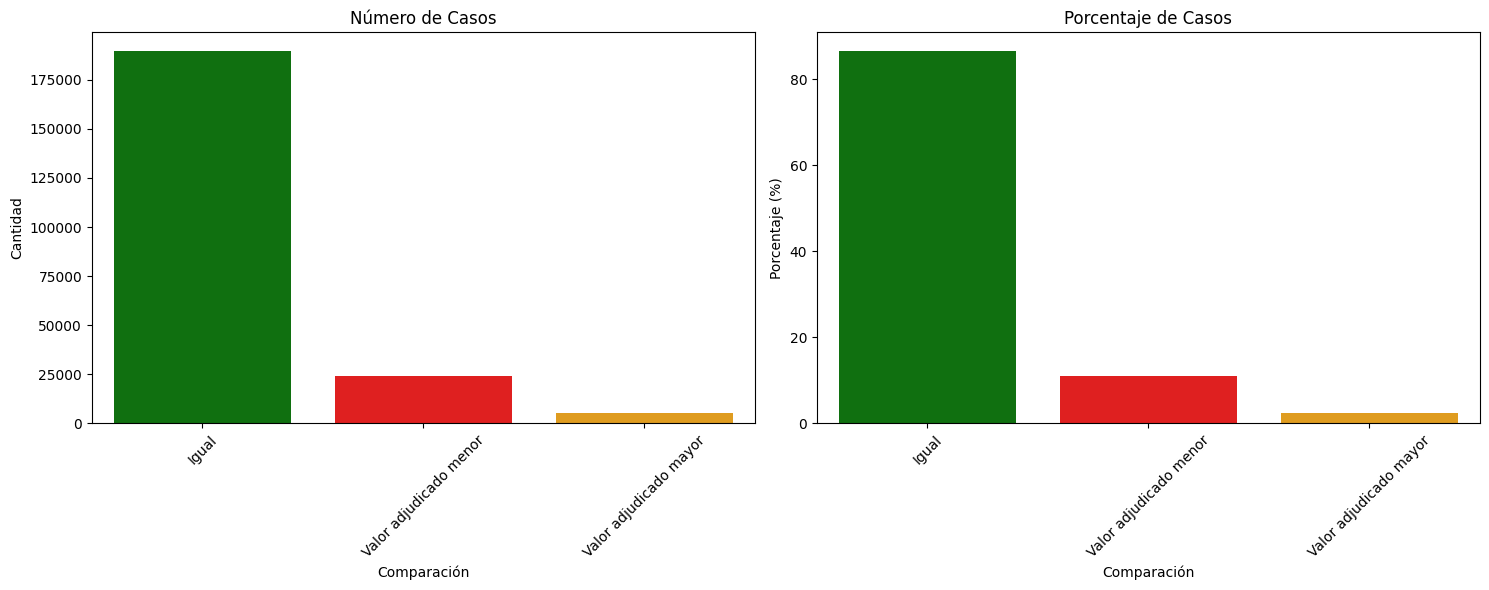


Estadísticas detalladas:
--------------------------------------------------
Igual:
  Casos: 189,734
  Porcentaje: 86.62%
Valor adjudicado menor:
  Casos: 24,275
  Porcentaje: 11.08%
Valor adjudicado mayor:
  Casos: 5,042
  Porcentaje: 2.30%

Estadísticas de las diferencias (Presupuesto - Valor adjudicado):
count    219051.00
mean       1396.78
std       35640.45
min     -978299.85
25%           0.00
50%           0.00
75%           0.00
max     8458065.89
Name: Diferencia, dtype: float64


In [11]:
# Cargar y preparar datos
df_2020 = pd.read_csv('CP_2020.csv', sep=';')

# Convertir columnas monetarias a numérico
df_2020['Presupuesto'] = df_2020['Presupuesto'].str.replace('$', '').str.replace(',', '.').astype(float)
df_2020['Valor adjudicado'] = df_2020['Valor adjudicado'].str.replace('$', '').str.replace(',', '.').astype(float)

# Crear categorías
df_2020['Comparación'] = np.where(df_2020['Presupuesto'] == df_2020['Valor adjudicado'], 
                                 'Igual',
                                 np.where(df_2020['Valor adjudicado'] > df_2020['Presupuesto'],
                                         'Valor adjudicado mayor',
                                         'Valor adjudicado menor'))

# Contar casos
conteo = df_2020['Comparación'].value_counts()
porcentajes = df_2020['Comparación'].value_counts(normalize=True) * 100

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras con números absolutos
sns.barplot(x=conteo.index, y=conteo.values, ax=ax1, 
            palette=['green', 'red', 'orange'])
ax1.set_title('Número de Casos')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de barras con porcentajes
sns.barplot(x=porcentajes.index, y=porcentajes.values, ax=ax2,
            palette=['green', 'red', 'orange'])
ax2.set_title('Porcentaje de Casos')
ax2.set_ylabel('Porcentaje (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Mostrar números exactos
print("\nEstadísticas detalladas:")
print("-" * 50)
for categoria in conteo.index:
    print(f"{categoria}:")
    print(f"  Casos: {conteo[categoria]:,}")
    print(f"  Porcentaje: {porcentajes[categoria]:.2f}%")

# Mostrar algunas estadísticas de las diferencias
df_2020['Diferencia'] = df_2020['Presupuesto'] - df_2020['Valor adjudicado']
print("\nEstadísticas de las diferencias (Presupuesto - Valor adjudicado):")
print(df_2020['Diferencia'].describe())

## 7) Estadísticas de la columna Presupuesto para dar una idea de lo que vamos a continuar a analizar

In [12]:
# Calcular media, mediana y promedio
media_presupuesto = df_2020['Presupuesto'].mean()
mediana_presupuesto = df_2020['Presupuesto'].median()
promedio_presupuesto = df_2020['Presupuesto'].mean()  # Promedio es lo mismo que la media

print("Valores estadísticos del Presupuesto:")
print("-" * 50)
print(f"Media: ${media_presupuesto:,.2f}")
print(f"Mediana: ${mediana_presupuesto:,.2f}")
print(f"Promedio: ${promedio_presupuesto:,.2f}")

Valores estadísticos del Presupuesto:
--------------------------------------------------
Media: $21,651.37
Mediana: $71.10
Promedio: $21,651.37


In [13]:
# Calcular moda
moda_presupuesto = df_2020['Presupuesto'].mode()[0]

print("Valores estadísticos del Presupuesto:")
print("-" * 50)
print(f"Moda: ${moda_presupuesto:,.2f}")

Valores estadísticos del Presupuesto:
--------------------------------------------------
Moda: $6,510.00


### 8) Basados en las estadísticas y la lata variabilidad en los presupuestos, 
Decidimos ver por intervalos de presupuesto, en qué casos el valor asignado es mayor, menor o igual al presupuesto asignado y registrar esos casos. Lo que se vio es que hay muchos casos de presupuestos asignados (en número y no porcentaje) donde el valor asignado difiere del presupuesto, eso es una primera pista hacia donde es donde más existirían casos de corrupción.

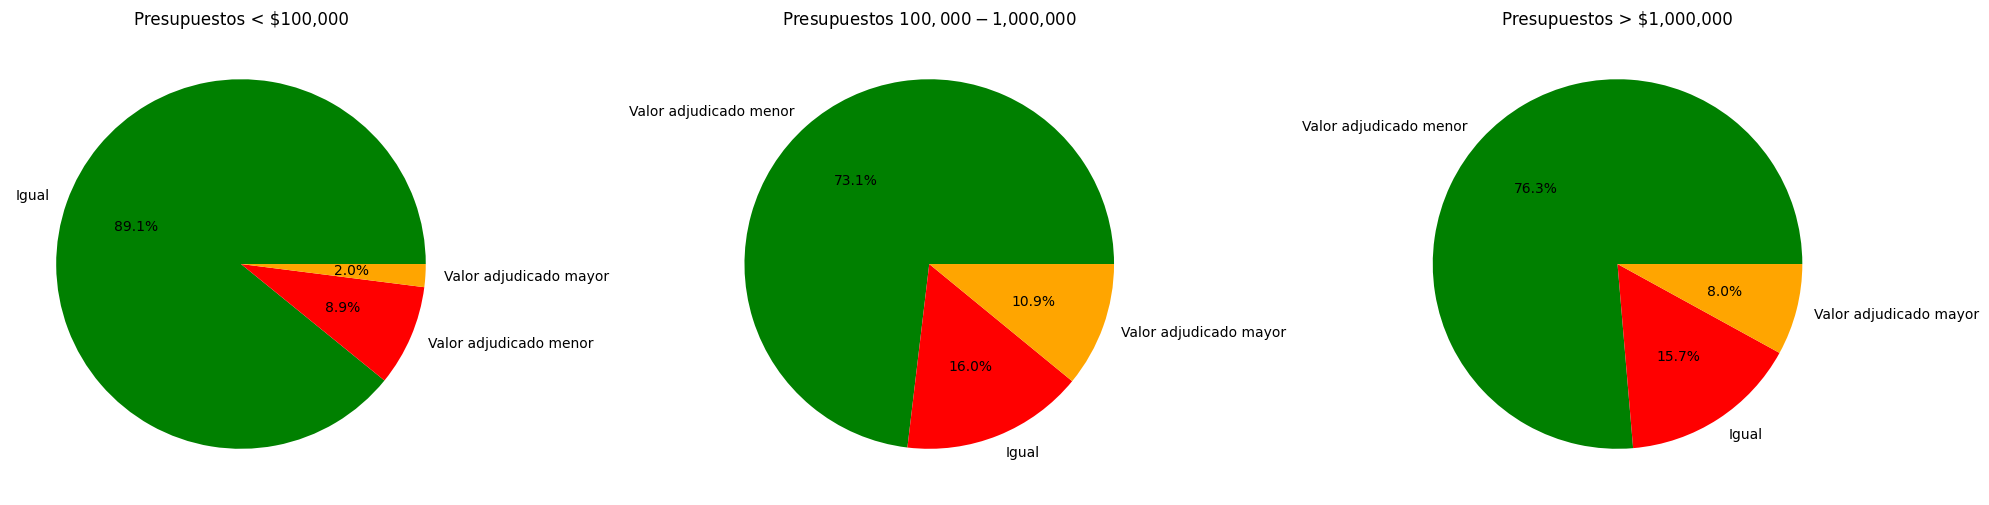


Estadísticas detalladas:
--------------------------------------------------

Presupuestos < $100,000:
Total de casos: 211,482 (96.5% del total)
Igual: 188,528 casos (89.1%)
Valor adjudicado menor: 18,720 casos (8.9%)
Valor adjudicado mayor: 4,234 casos (2.0%)

Presupuestos $100,000 - $1,000,000:
Total de casos: 6,918 (3.2% del total)
Valor adjudicado menor: 5,058 casos (73.1%)
Igual: 1,104 casos (16.0%)
Valor adjudicado mayor: 756 casos (10.9%)

Presupuestos > $1,000,000:
Total de casos: 651 (0.3% del total)
Valor adjudicado menor: 497 casos (76.3%)
Igual: 102 casos (15.7%)
Valor adjudicado mayor: 52 casos (8.0%)


In [14]:
# Crear categorías de comparación
df_2020['Comparación'] = np.where(df_2020['Presupuesto'] == df_2020['Valor adjudicado'], 
                                 'Igual',
                                 np.where(df_2020['Valor adjudicado'] > df_2020['Presupuesto'],
                                         'Valor adjudicado mayor',
                                         'Valor adjudicado menor'))

# Crear figura con tres subplots para los gráficos de pastel
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Gráfico para presupuestos menores a $100,000
df_menor_100k = df_2020[df_2020['Presupuesto'] < 100000]
valores_menor_100k = df_menor_100k['Comparación'].value_counts()
ax1.pie(valores_menor_100k, labels=valores_menor_100k.index, autopct='%1.1f%%',
        colors=['green', 'red', 'orange'])
ax1.set_title('Presupuestos < $100,000')

# Gráfico para presupuestos entre $100,000 y $1,000,000
df_entre_100k_y_1m = df_2020[(df_2020['Presupuesto'] >= 100000) & (df_2020['Presupuesto'] < 1000000)]
valores_entre_100k_y_1m = df_entre_100k_y_1m['Comparación'].value_counts()
ax2.pie(valores_entre_100k_y_1m, labels=valores_entre_100k_y_1m.index, autopct='%1.1f%%',
        colors=['green', 'red', 'orange'])
ax2.set_title('Presupuestos $100,000 - $1,000,000')

# Gráfico para presupuestos mayores a $1,000,000
df_mayor_1m = df_2020[df_2020['Presupuesto'] >= 1000000]
valores_mayor_1m = df_mayor_1m['Comparación'].value_counts()
ax3.pie(valores_mayor_1m, labels=valores_mayor_1m.index, autopct='%1.1f%%',
        colors=['green', 'red', 'orange'])
ax3.set_title('Presupuestos > $1,000,000')

plt.tight_layout()
plt.show()

# Mostrar estadísticas detalladas para cada categoría
print("\nEstadísticas detalladas:")
print("-" * 50)

for categoria, df_categoria in zip(
    ['< $100,000', '$100,000 - $1,000,000', '> $1,000,000'],
    [df_menor_100k, df_entre_100k_y_1m, df_mayor_1m]
):
    print(f"\nPresupuestos {categoria}:")
    n_casos = len(df_categoria)
    print(f"Total de casos: {n_casos:,} ({n_casos/len(df_2020)*100:.1f}% del total)")
    valores = df_categoria['Comparación'].value_counts()
    for comp, valor in valores.items():
        print(f"{comp}: {valor:,} casos ({valor/n_casos*100:.1f}%)")

### 9) Para continuar con el análisis, 
Queremos saber qué tipo de identificación tienen todas las obras públicas y ver en cuales de esas áreas se da mayor desbalance de valor asignado con presupuesto.


In [15]:
# Obtener valores únicos
descripciones_unicas = df_2020['Descripción CPC N9'].unique()

print(f"Total de descripciones únicas: {len(descripciones_unicas)}")
print("\nLista de descripciones:")
print("-" * 50)
for descripcion in sorted(descripciones_unicas):
    print(f"- {descripcion}")

Total de descripciones únicas: 5286

Lista de descripciones:
--------------------------------------------------
-  CONSTRUCCION, AMPLIACIONES, REFORMAS CENTROS MEDICOS
-  CONSTRUCCIÓN DE SUBESTACIONES ELÉCTRICAS DE ALTA Y EXTRA ALTA TENSIÓN
-  CUALQUIER OTRO SERVICIO  QUE PUEDA AFECTAR A LA CONCEPCION O A LA NATURALEZADE PLAN Y  DE ASESORAMIENTO Y  PREDISENO ARQUITECTONICOS COMO LA CONSTRUCCION DE UN PROYECTO. LA PRESTACION DE LOS SERVICIOS CITADOS NO TIENE POR QUE REFERIRSE NECESARIAMENTE A U
-  INSTALACION Y MANTENIMIENTO DE CABLEADO ESTRUCTURADO
-  LIBROS CIENTIFICOS ,DE CONS
-  MONTAJE ELECTROMECANICO DE SUBESTACIONES Y LINEAS DE TRANSMISION
-  OTROS SERVICIOS DE ALMACENAMIENTO
-  PANALES Y FORROS DE PANALES PARA LACTANTES Y ARTICULOS HIGIENICOS ANALOGOS
-  REPARACION DE TUBERIAS DE POZOS DE AGUA
-  SERVICIOS DE ALMACENAMIENTO DE  PRODUCTOS PETROLIFEROS
-  SERVICIOS DE ASISTENCIA DE ASESORAMIENTO, ORIENTACION Y OPERACIONALES RELATIVOS A LA GESTION DE LOS RECURSOS HUMANOS DE UNA ORG

### 10) Se desea ver qué servicios o descripciones tienen valor ajustado igual o diferente al presupuesto asignado

In [18]:
# Calcular promedios por descripción
df_promedios = df_2020.groupby('Descripción CPC N9').agg({
    'Presupuesto': 'mean',
    'Valor adjudicado': 'mean'
}).reset_index()

# Determinar la tendencia predominante
df_promedios['Tendencia'] = np.where(
    np.abs(df_promedios['Presupuesto'] - df_promedios['Valor adjudicado']) < df_promedios['Presupuesto'] * 0.01,
    'Igual',
    np.where(df_promedios['Valor adjudicado'] > df_promedios['Presupuesto'],
             'Valor adjudicado mayor',
             'Valor adjudicado menor')
)

# Crear scatter plot
fig = px.scatter(df_promedios, 
                x='Presupuesto', 
                y='Valor adjudicado',
                color='Tendencia',
                hover_data=['Descripción CPC N9'],
                color_discrete_map={
                    'Igual': 'green',
                    'Valor adjudicado mayor': 'red',
                    'Valor adjudicado menor': 'orange'
                },
                title='Presupuesto vs Valor Adjudicado por Descripción')

# Añadir línea diagonal de referencia
max_val = max(df_promedios['Presupuesto'].max(), df_promedios['Valor adjudicado'].max())
fig.add_scatter(x=[0, max_val], 
                y=[0, max_val], 
                mode='lines', 
                line=dict(color='black', dash='dash'),
                name='Presupuesto = Valor adjudicado',
                showlegend=True)

fig.update_traces(marker=dict(size=12))
fig.update_layout(
    xaxis_title="Presupuesto ($)",
    yaxis_title="Valor Adjudicado ($)",
)

fig.show()

### 11) Vamos a ver los mismos plots de acuerdo con otros valores límite de presupuesto

In [19]:
# Primer plot: Presupuesto y Valor Adjudicado hasta 1M
fig1 = px.scatter(df_promedios, 
                 x='Presupuesto', 
                 y='Valor adjudicado',
                 color='Tendencia',
                 hover_data=['Descripción CPC N9'],
                 color_discrete_map={
                     'Igual': 'green',
                     'Valor adjudicado mayor': 'red',
                     'Valor adjudicado menor': 'orange'
                 },
                 title='Presupuesto vs Valor Adjudicado (Hasta 1M)')

fig1.add_scatter(x=[0, 1000000], 
                 y=[0, 1000000], 
                 mode='lines', 
                 line=dict(color='black', dash='dash'),
                 name='Presupuesto = Valor adjudicado',
                 showlegend=True)

fig1.update_traces(marker=dict(size=12))
fig1.update_layout(
    xaxis_title="Presupuesto ($)",
    yaxis_title="Valor Adjudicado ($)",
    yaxis=dict(
        dtick=100000,  # Divisiones cada 100,000
        range=[0, 1000000]
    ),
    xaxis=dict(
        dtick=100000,  # Divisiones cada 100,000
        range=[0, 1000000]
    )
)

fig1.show()

# Segundo plot: Presupuesto y Valor Adjudicado de 1M a 10M
fig2 = px.scatter(df_promedios, 
                 x='Presupuesto', 
                 y='Valor adjudicado',
                 color='Tendencia',
                 hover_data=['Descripción CPC N9'],
                 color_discrete_map={
                     'Igual': 'green',
                     'Valor adjudicado mayor': 'red',
                     'Valor adjudicado menor': 'orange'
                 },
                 title='Presupuesto vs Valor Adjudicado (1M a 10M)')

fig2.add_scatter(x=[1000000, 10000000], 
                 y=[1000000, 10000000], 
                 mode='lines', 
                 line=dict(color='black', dash='dash'),
                 name='Presupuesto = Valor adjudicado',
                 showlegend=True)

fig2.update_traces(marker=dict(size=12))
fig2.update_layout(
    xaxis_title="Presupuesto ($)",
    yaxis_title="Valor Adjudicado ($)",
    yaxis=dict(
        dtick=2000000,  # Divisiones cada 2,000,000
        range=[1000000, 10000000]
    ),
    xaxis=dict(
        dtick=2000000,  # Divisiones cada 2,000,000
        range=[1000000, 10000000]
    )
)

fig2.show()


### 12) Vamos a crear un archivo con todas las descripciones para hacer una mejor clasificación, 
Por ejemplo, servicios de salud, equipos médicos iría para Salud por ejemplo y así vamos reagrupando esas categorías en grupos grandes.


In [20]:
# Contar el número de compras por descripción
conteo_descripciones = df_2020['Descripción CPC N9'].value_counts()

print("Número de compras por descripción CPC N9:")
print("-" * 50)
for descripcion, conteo in conteo_descripciones.items():
    print(f"- {descripcion}: {conteo:,} compras")

print("\nTotal de descripciones:", len(conteo_descripciones))
print("Total de compras:", len(df_2020))

Número de compras por descripción CPC N9:
--------------------------------------------------
- SERVICIOS DE CONFECCION DE PRENDAS DE VESTIR: 3,713 compras
- RESMA DE PAPEL BOND A4 DE 75 GR: 3,536 compras
- ARCHIVADORES TAMANO OFICIO LOMO 8 CMS: 2,989 compras
- SERVICIOS DE CONFECCION DE UNIFORMES: 2,536 compras
- PAPEL HIGIENICO JUMBO DOBLE HOJA BLANCO 250 METROS: 2,156 compras
- ESFEROGRAFICO AZUL PUNTA FINA: 2,058 compras
- CLORO LIQUIDO AL 5 POR CIENTO, GALON: 2,028 compras
- SERVICIOS DE LIMPIEZA Y MANTENIMIENTO DE VIVIENDAS O DE EDIFICIOS COMERCIALES, ADMINISTRATIVOS E INDUSTRIALE, LIMPIEZA Y ENCERADO DE PISOS: 1,961 compras
- PAPEL TOALLA DE MANOS BLANCO EN Z 150 UNIDADES: 1,933 compras
- DESPERDICIOS Y DESECHOS DE FUNDICION: CHATARRA DE HIERRO FUNDIDO, DESPERDICIOS.: 1,739 compras
- ESCOBA DE PLASTICO FIBRA SUAVE: 1,682 compras
- DESINFECTANTE AMONIO CUATERNARIO GALON: 1,660 compras
- TINTA CORRECTORA TIPO ESFERO: 1,650 compras
- INSUMOS DE USO GENERAL: 1,594 compras
- SERVICIO 

In [21]:
# Obtener el conteo de cada descripción
conteo_descripciones = df_2020['Descripción CPC N9'].value_counts().reset_index()
conteo_descripciones.columns = ['Descripción CPC N9', 'Número de Compras']

# Guardar en Excel
conteo_descripciones.to_excel('descripciones_CPC_N9.xlsx', index=False)

print("Archivo 'descripciones_CPC_N9.xlsx' creado con éxito.")

Archivo 'descripciones_CPC_N9.xlsx' creado con éxito.


### 13) Vamos a utilizar NLP para hacer la clasificación de la mejor forma posible, 
Y basado en esos resultados ver en las nuevas categorías que porcentaje el valor asignado es diferente o igual al valor asignado. 


In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
import re

# Cargar el archivo Excel
df_descripciones = pd.read_excel('descripciones_CPC_N9.xlsx')

# Diccionario de categorías con palabras clave más completo
categorias_detalladas = {
    'ALIMENTOS': [
        'arroz', 'pollo', 'carne', 'aliment', 'comid', 'cereal', 
        'leche', 'huev', 'pan', 'frut', 'verdur', 'pescad',
        'alimentici', 'viveres', 'azucar', 'aceite', 'sal',
        'descascar', 'granel', 'refriger'
    ],
    'ENERGIA_ELECTRICIDAD': [
        'cable', 'energi', 'electric', 'termic', 'volt', 'tension',
        'transformador', 'conductor', 'potenci', 'electr', 'bateria',
        'iluminacion', 'foco', 'lampara'
    ],
    'LIMPIEZA_HIGIENE': [
        'higien', 'jabon', 'desinf', 'limp', 'detergent',
        'sanitari', 'aseo', 'toall', 'desech', 'trapeador',
        'escoba', 'cepillo', 'cloro', 'papel', 'higienico'
    ],
    'SUMINISTROS_OFICINA': [
        'resma', 'papel', 'bond', 'archiv', 'carpeta', 'folder',
        'perfor', 'grapa', 'clip', 'estilet', 'cuchill',
        'tijera', 'lapiz', 'esfero', 'marcador', 'borrador',
        'oficin', 'papeler', 'sacapunt', 'permanent', 'cuadern',
        'libret', 'toner', 'cartucho'
    ],
    'CONSTRUCCION_MATERIALES': [
        'cement', 'hierr', 'construccion', 'material', 'herramient',
        'metal', 'acero', 'tuber', 'pintur', 'ferret', 'pvc',
        'tornill', 'clavos', 'arena', 'piedra', 'bloque'
    ],
    'TECNOLOGIA_EQUIPOS': [
        'comput', 'impres', 'software', 'hardware', 'red', 'servidor',
        'equip', 'tecnolog', 'digital', 'informatic', 'teclado',
        'mouse', 'monitor', 'laptop', 'disco', 'memoria'
    ],
    'MOBILIARIO': [
        'muebl', 'silla', 'escrit', 'mesa', 'estant',
        'mobil', 'armari', 'gabinet', 'anaquel', 'archivador',
        'biblioteca', 'vitrina', 'cajon', 'estacion'
    ],
    'TEXTILES_ROPA': [
        'ropa', 'textil', 'tela', 'unifor', 'vestiment', 'calzad',
        'zapato', 'prenda', 'vestuar', 'camis', 'pantal', 'falda',
        'chalec', 'overall', 'mandil'
    ],
    'TRANSPORTE': [
        'transport', 'vehicul', 'autobus', 'auto', 'camion', 
        'camionet', 'furgon', 'motor', 'llant', 'neumatic',
        'repuest', 'automotor', 'alquiler', 'flete', 'combustible'
    ]
}

def preprocesar_texto(texto):
    # Convertir a minúsculas y eliminar caracteres especiales
    texto = str(texto).lower()
    texto = re.sub(r'[^\w\s]', ' ', texto)
    # Tokenización
    tokens = word_tokenize(texto)
    # Stemming
    stemmer = SnowballStemmer('spanish')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def asignar_categoria(texto):
    texto_procesado = preprocesar_texto(texto)
    
    # Puntajes para cada categoría
    puntajes = {}
    for categoria, palabras_clave in categorias_detalladas.items():
        # Contar coincidencias de palabras clave
        coincidencias = sum(1 for palabra in palabras_clave if palabra in texto_procesado)
        # Dar más peso si las palabras clave aparecen al inicio
        primeras_palabras = ' '.join(texto_procesado.split()[:3])
        coincidencias_inicio = sum(2 for palabra in palabras_clave if palabra in primeras_palabras)
        puntajes[categoria] = coincidencias + coincidencias_inicio
    
    # Asignar categoría con mayor puntaje
    if max(puntajes.values()) > 0:
        return max(puntajes.items(), key=lambda x: x[1])[0]
    return 'OTROS'

# Aplicar categorización
df_descripciones['Categoria'] = df_descripciones['Descripción CPC N9'].apply(asignar_categoria)

# Crear resumen
resumen = df_descripciones.groupby('Categoria').agg({
    'Número de Compras': 'sum',
    'Descripción CPC N9': lambda x: list(x)
}).reset_index()

# Ordenar por número de compras
resumen = resumen.sort_values('Número de Compras', ascending=False)

# Guardar resultados
with pd.ExcelWriter('categorias_nlp_mejorado.xlsx') as writer:
    resumen.to_excel(writer, sheet_name='Resumen', index=False)
    df_descripciones.to_excel(writer, sheet_name='Detalle', index=False)




#  Obtener las categorías del archivo procesado
df_categorias = pd.read_excel('categorias_nlp_mejorado.xlsx', sheet_name='Detalle')

# Crear diccionario de mapeo descripción-categoría
categorias_mapping = dict(zip(df_categorias['Descripción CPC N9'], df_categorias['Categoria']))

# Agregar categorías al df_2020
df_2020['Categoria'] = df_2020['Descripción CPC N9'].map(categorias_mapping)

# Analizar relación presupuesto-valor adjudicado
def analizar_relacion(presupuesto, valor_adjudicado):
    margen = 0.01  # 1% de margen
    diff = abs(presupuesto - valor_adjudicado) / presupuesto
    
    if diff <= margen:
        return 'IGUAL'
    elif valor_adjudicado > presupuesto:
        return 'MAYOR'
    else:
        return 'MENOR'

# Calcular relaciones para cada fila
df_2020['Relacion'] = df_2020.apply(lambda x: analizar_relacion(x['Presupuesto'], x['Valor adjudicado']), axis=1)

# Calcular porcentajes por categoría
resultados = []
for categoria in df_2020['Categoria'].unique():
    df_cat = df_2020[df_2020['Categoria'] == categoria]
    total = len(df_cat)
    
    igual = (df_cat['Relacion'] == 'IGUAL').sum()
    mayor = (df_cat['Relacion'] == 'MAYOR').sum()
    menor = (df_cat['Relacion'] == 'MENOR').sum()
    
    resultados.append({
        'Categoria': categoria,
        'Total_Compras': total,
        'Pct_Igual': (igual/total)*100,
        'Pct_Mayor': (mayor/total)*100,
        'Pct_Menor': (menor/total)*100
    })

# Crear DataFrame de resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Total_Compras', ascending=False)

# Crear gráfico con Plotly
fig = go.Figure()

# Agregar barras para cada tipo de relación
fig.add_trace(go.Bar(
    name='Igual al Presupuesto',
    x=df_resultados['Categoria'],
    y=df_resultados['Pct_Igual'],
    marker_color='#2ecc71'
))

fig.add_trace(go.Bar(
    name='Mayor al Presupuesto',
    x=df_resultados['Categoria'],
    y=df_resultados['Pct_Mayor'],
    marker_color='#e74c3c'
))

fig.add_trace(go.Bar(
    name='Menor al Presupuesto',
    x=df_resultados['Categoria'],
    y=df_resultados['Pct_Menor'],
    marker_color='#f39c12'
))

# Configurar layout
fig.update_layout(
    title='Distribución de Relaciones Presupuesto-Valor por Categoría',
    xaxis_title='Categoría',
    yaxis_title='Porcentaje (%)',
    barmode='group',
    height=600,
    showlegend=True,
    legend_title='Relación',
    font=dict(size=10)
)

# Rotar etiquetas del eje x
fig.update_xaxes(tickangle=45)

# Mostrar gráfico
fig.show()

# Mostrar resumen numérico
print("\nResumen por Categoría:")
print("-" * 80)
print(df_resultados.round(2))


Resumen por Categoría:
--------------------------------------------------------------------------------
                 Categoria  Total_Compras  Pct_Igual  Pct_Mayor  Pct_Menor
0                    OTROS         127363      92.16       0.01       7.83
1      SUMINISTROS_OFICINA          39928      98.36       0.00       1.64
2         LIMPIEZA_HIGIENE          28283      98.09       0.00       1.91
7                ALIMENTOS           5327      94.89       0.00       5.11
6  CONSTRUCCION_MATERIALES           5075      66.36       0.16      33.48
4               TRANSPORTE           3646      53.87       0.03      46.11
5       TECNOLOGIA_EQUIPOS           3006      50.53       0.00      49.47
9            TEXTILES_ROPA           2923      97.84       0.00       2.16
8     ENERGIA_ELECTRICIDAD           2214      65.22       0.00      34.78
3               MOBILIARIO           1286      88.26       0.00      11.74


### 14) Vamos a enfocarnos en que áreas estratégicas se ha destinado menor valor asignado que presupuesto 

In [23]:
# Ordenar el DataFrame por porcentaje de valores menores al presupuesto
df_analisis_menor = df_resultados.sort_values('Pct_Menor', ascending=False)

# Crear gráfico específico para valores menores al presupuesto
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_analisis_menor['Categoria'],
    y=df_analisis_menor['Pct_Menor'],
    marker_color='#f39c12',
    text=df_analisis_menor['Pct_Menor'].round(1),
    textposition='auto',
))

fig.update_layout(
    title='Porcentaje de Compras con Valor Menor al Presupuesto por Categoría',
    xaxis_title='Categoría',
    yaxis_title='Porcentaje (%)',
    height=500,
    showlegend=False
)

fig.update_xaxes(tickangle=45)

# Mostrar gráfico
fig.show()

# Mostrar resumen numérico ordenado
print("\nCategorías ordenadas por porcentaje de valores menores al presupuesto:")
print("-" * 80)
print(df_analisis_menor[['Categoria', 'Total_Compras', 'Pct_Menor']].round(2))

# Mostrar top 5 categorías con mayor porcentaje de valores menores
print("\nTop 5 categorías con mayor porcentaje de valores menores al presupuesto:")
print("-" * 80)
for _, row in df_analisis_menor.head().iterrows():
    print(f"Categoría: {row['Categoria']}")
    print(f"Total de compras: {row['Total_Compras']}")
    print(f"Porcentaje menor al presupuesto: {row['Pct_Menor']:.1f}%")
    print("-" * 40)


Categorías ordenadas por porcentaje de valores menores al presupuesto:
--------------------------------------------------------------------------------
                 Categoria  Total_Compras  Pct_Menor
5       TECNOLOGIA_EQUIPOS           3006      49.47
4               TRANSPORTE           3646      46.11
8     ENERGIA_ELECTRICIDAD           2214      34.78
6  CONSTRUCCION_MATERIALES           5075      33.48
3               MOBILIARIO           1286      11.74
0                    OTROS         127363       7.83
7                ALIMENTOS           5327       5.11
9            TEXTILES_ROPA           2923       2.16
2         LIMPIEZA_HIGIENE          28283       1.91
1      SUMINISTROS_OFICINA          39928       1.64

Top 5 categorías con mayor porcentaje de valores menores al presupuesto:
--------------------------------------------------------------------------------
Categoría: TECNOLOGIA_EQUIPOS
Total de compras: 3006
Porcentaje menor al presupuesto: 49.5%
-----------------

### 15) En que áreas se ha destinado mayor número de compras publicas

In [24]:
# Ver tipos únicos de contratación y su conteo
conteo_tipos = df_2020['Tipo Contratación'].value_counts()

# Mostrar resultados
print("\nTipos de Contratación y su frecuencia:")
print("-" * 50)
for tipo, conteo in conteo_tipos.items():
    print(f"{tipo}: {conteo:,} compras")

# Mostrar porcentajes
total = conteo_tipos.sum()
print("\nDistribución porcentual:")
print("-" * 50)
for tipo, conteo in conteo_tipos.items():
    porcentaje = (conteo/total) * 100
    print(f"{tipo}: {porcentaje:.1f}%")

# Crear gráfico de barras con Plotly
fig = go.Figure(data=[
    go.Bar(
        x=conteo_tipos.index,
        y=conteo_tipos.values,
        text=conteo_tipos.values,
        textposition='auto',
    )
])

fig.update_layout(
    title='Distribución de Tipos de Contratación',
    xaxis_title='Tipo de Contratación',
    yaxis_title='Número de Compras',
    height=500
)

fig.update_xaxes(tickangle=45)

fig.show()


Tipos de Contratación y su frecuencia:
--------------------------------------------------
Catálogo Electrónico: 182,740 compras
Subasta Inversa Electrónica: 14,397 compras
Publicación Especial: 5,248 compras
Menor Cuantía: 4,320 compras
Contratación directa: 2,438 compras
Bienes y Servicios únicos: 1,498 compras
Contratación interadministrativa: 1,458 compras
Cotización: 1,280 compras
Comunicación Social: 1,277 compras
Ferias Inclusivas: 1,240 compras
Arrendamiento de bienes inmuebles: 669 compras
Licitación de Seguros: 569 compras
Obra artística, científica o literaria: 533 compras
Repuestos o Accesorios: 522 compras
Lista corta: 370 compras
Licitación: 272 compras
Asesoría y Patrocinio Jurídico: 72 compras
Giro específico del negocio de empresas públicas: 53 compras
Transporte de correo interno o internacional: 30 compras
Concurso Público: 27 compras
Adquisición de bienes inmuebles: 16 compras
Cont.  De Instituciones financieras y de Seguros del Estado: 14 compras
Contrataciones con

### 16) Queremos saber en qué provincias ha habido mayor número de compras publicas

In [25]:
# Lista para almacenar los registros
registros = []

# Región Sierra
región = 'Sierra'

# Provincias y cantones de la Sierra
provincias_sierra = {
    'Azuay': ['Cuenca', 'Camilo Ponce Enríquez', 'Chordeleg', 'El Pan', 'Girón',
              'Guachapala', 'Gualaceo', 'Nabón', 'Oña', 'Paute', 'Pucará',
              'San Fernando', 'Santa Isabel', 'Sevilla de Oro', 'Sígsig'],
    'Bolívar': ['Guaranda', 'Caluma', 'Chillanes', 'Chimbo', 'Echeandía',
                'Las Naves', 'San Miguel'],
    'Cañar': ['Azogues', 'Biblián', 'Cañar', 'Déleg', 'El Tambo', 'La Troncal',
              'Suscal'],
    'Carchi': ['Tulcán', 'Bolívar', 'Espejo', 'Mira', 'Montúfar', 'San Pedro de Huaca'],
    'Chimborazo': ['Riobamba', 'Alausí', 'Chambo', 'Chunchi', 'Colta', 'Cumandá',
                   'Guamote', 'Guano', 'Pallatanga', 'Penipe'],
    'Cotopaxi': ['Latacunga', 'La Maná', 'Pangua', 'Pujilí', 'Salcedo',
                 'Saquisilí', 'Sigchos'],
    'Imbabura': ['Ibarra', 'Antonio Ante', 'Cotacachi', 'Otavalo', 'Pimampiro',
                 'San Miguel de Urcuquí'],
    'Loja': ['Loja', 'Calvas', 'Catamayo', 'Celica', 'Chaguarpamba', 'Espíndola',
             'Gonzanamá', 'Macará', 'Olmedo', 'Paltas', 'Pindal', 'Puyango',
             'Quilanga', 'Saraguro', 'Sozoranga', 'Zapotillo'],
    'Pichincha': ['Quito', 'Cayambe', 'Mejía', 'Pedro Moncayo',
                  'Pedro Vicente Maldonado', 'Puerto Quito', 'Rumiñahui',
                  'San Miguel de los Bancos'],
    'Tungurahua': ['Ambato', 'Baños de Agua Santa', 'Cevallos', 'Mocha',
                   'Patate', 'Pelileo', 'Píllaro', 'Quero', 'Tisaleo'],
}

# Añadir registros de la Sierra
for provincia, cantones in provincias_sierra.items():
    for canton in cantones:
        registros.append({'Región': región, 'Provincia': provincia, 'Cantón': canton})

# Región Costa
región = 'Costa'

# Provincias y cantones de la Costa
provincias_costa = {
    'El Oro': ['Machala', 'Arenillas', 'Atahualpa', 'Balsas', 'Chilla', 'El Guabo',
               'Huaquillas', 'Las Lajas', 'Marcabelí', 'Pasaje', 'Piñas',
               'Portovelo', 'Santa Rosa', 'Zaruma'],
    'Esmeraldas': ['Esmeraldas', 'Atacames', 'Eloy Alfaro', 'Muisne', 'Quinindé',
                   'Rioverde', 'San Lorenzo'],
    'Guayas': ['Guayaquil', 'Alfredo Baquerizo Moreno (Jujan)', 'Balao', 'Balzar',
               'Colimes', 'Daule', 'Durán', 'El Empalme', 'El Triunfo',
               'General Antonio Elizalde (Bucay)', 'Isidro Ayora',
               'Lomas de Sargentillo', 'Marcelino Maridueña', 'Milagro',
               'Naranjal', 'Naranjito', 'Nobol', 'Palestina', 'Pedro Carbo',
               'Playas (General Villamil)', 'Salitre (Urbina Jado)', 'Samborondón',
               'Santa Lucía', 'Simón Bolívar', 'Yaguachi'],
    'Los Ríos': ['Babahoyo', 'Baba', 'Buena Fe', 'Montalvo', 'Mocache', 'Palenque',
                 'Puebloviejo', 'Quevedo', 'Quinsaloma', 'Urdaneta', 'Valencia',
                 'Ventanas', 'Vinces'],
    'Manabí': ['Portoviejo', 'Bolívar', 'Chone', 'El Carmen', 'Flavio Alfaro',
               'Jama', 'Jaramijó', 'Jipijapa', 'Junín', 'Manta', 'Montecristi',
               'Olmedo', 'Paján', 'Pedernales', 'Pichincha', 'Puerto López',
               'Rocafuerte', 'San Vicente', 'Santa Ana', 'Sucre', 'Tosagua',
               '24 de Mayo'],
    'Santa Elena': ['Santa Elena', 'La Libertad', 'Salinas'],
    'Santo Domingo de los Tsáchilas': ['Santo Domingo', 'La Concordia'],
}

# Añadir registros de la Costa
for provincia, cantones in provincias_costa.items():
    for canton in cantones:
        registros.append({'Región': región, 'Provincia': provincia, 'Cantón': canton})

# Región Oriente
región = 'Oriente'

# Provincias y cantones del Oriente
provincias_oriente = {
    'Morona Santiago': ['Morona (Macas)', 'Gualaquiza', 'Huamboya', 'Limón Indanza',
                        'Logroño', 'Pablo Sexto', 'Palora', 'San Juan Bosco',
                        'Santiago', 'Sucúa', 'Taisha', 'Tiwintza'],
    'Napo': ['Tena', 'Archidona', 'Carlos Julio Arosemena Tola', 'El Chaco',
             'Quijos'],
    'Orellana': ['Orellana (Puerto Francisco de Orellana)', 'Aguarico',
                 'La Joya de los Sachas', 'Loreto'],
    'Pastaza': ['Pastaza (Puyo)', 'Arajuno', 'Mera', 'Santa Clara'],
    'Sucumbíos': ['Lago Agrio', 'Cascales', 'Cuyabeno', 'Gonzalo Pizarro',
                  'Putumayo', 'Shushufindi', 'Sucumbíos'],
    'Zamora Chinchipe': ['Zamora', 'Centinela del Cóndor', 'Chinchipe',
                         'El Pangui', 'Nangaritza', 'Palanda', 'Paquisha',
                         'Yacuambi', 'Yantzaza'],
}

# Añadir registros del Oriente
for provincia, cantones in provincias_oriente.items():
    for canton in cantones:
        registros.append({'Región': región, 'Provincia': provincia, 'Cantón': canton})

# Región Galápagos
región = 'Galápagos'

# Provincias y cantones de Galápagos
provincias_galapagos = {
    'Galápagos': ['San Cristóbal', 'Isabela', 'Santa Cruz'],
}

# Añadir registros de Galápagos
for provincia, cantones in provincias_galapagos.items():
    for canton in cantones:
        registros.append({'Región': región, 'Provincia': provincia, 'Cantón': canton})

# Crear el DataFrame
df = pd.DataFrame(registros)

# Mostrar el DataFrame completo
print(df)


        Región         Provincia                 Cantón
0       Sierra             Azuay                 Cuenca
1       Sierra             Azuay  Camilo Ponce Enríquez
2       Sierra             Azuay              Chordeleg
3       Sierra             Azuay                 El Pan
4       Sierra             Azuay                  Girón
..         ...               ...                    ...
216    Oriente  Zamora Chinchipe               Yacuambi
217    Oriente  Zamora Chinchipe               Yantzaza
218  Galápagos         Galápagos          San Cristóbal
219  Galápagos         Galápagos                Isabela
220  Galápagos         Galápagos             Santa Cruz

[221 rows x 3 columns]


In [26]:
from difflib import get_close_matches

# 1. Convertir la lista registros a DataFrame
df_registros = pd.DataFrame(registros)

# 2. Crear el mapeo de cantones a regiones
canton_region = {}
for _, row in df_registros.iterrows():
    canton_region[row['Cantón'].lower()] = row['Región']

# 3. Función para encontrar la región
def encontrar_region(canton):
    if pd.isna(canton):
        return 'No especificado'
    
    canton = str(canton).lower().strip()
    
    # Búsqueda directa
    if canton in canton_region:
        return canton_region[canton]
    
    # Búsqueda por coincidencia aproximada
    cantones_conocidos = list(canton_region.keys())
    coincidencias = get_close_matches(canton, cantones_conocidos, n=1, cutoff=0.8)
    
    if coincidencias:
        return canton_region[coincidencias[0]]
    
    return 'No especificado'

# 4. Agregar la columna 'Region' a df_2020
df_2020['Region'] = df_2020['Canton Entidad'].apply(encontrar_region)

# 5. Mostrar distribución
distribucion = df_2020['Region'].value_counts()

# 6. Visualización con Plotly
fig = go.Figure(data=[
    go.Bar(
        x=distribucion.index,
        y=distribucion.values,
        text=distribucion.values,
        textposition='auto',
    )
])

fig.update_layout(
    title='Distribución de Compras por Región',
    xaxis_title='Región',
    yaxis_title='Número de Compras',
    height=500
)

fig.show()

# 7. Mostrar resumen numérico
print("\nDistribución de compras por región:")
print("-" * 50)
for region, conteo in distribucion.items():
    porcentaje = (conteo/len(df_2020))*100
    print(f"{region}: {conteo:,} compras ({porcentaje:.1f}%)")

# 8. Mostrar algunos ejemplos de mapeo
print("\nEjemplos de mapeo Canton-Región:")
print("-" * 50)
print(df_2020[['Canton Entidad', 'Region']].head(10))

# 9. Verificar cantones no identificados
no_identificados = df_2020[df_2020['Region'] == 'No especificado']['Canton Entidad'].unique()
if len(no_identificados) > 0:
    print("\nCantones no identificados:")
    print("-" * 50)
    for canton in no_identificados:
        print(f"- {canton}")


Distribución de compras por región:
--------------------------------------------------
Sierra: 108,645 compras (49.6%)
Costa: 74,084 compras (33.8%)
Oriente: 21,810 compras (10.0%)
No especificado: 12,897 compras (5.9%)
Galápagos: 1,615 compras (0.7%)

Ejemplos de mapeo Canton-Región:
--------------------------------------------------
  Canton Entidad Region
0     24 DE MAYO  Costa
1     24 DE MAYO  Costa
2     24 DE MAYO  Costa
3     24 DE MAYO  Costa
4     24 DE MAYO  Costa
5     24 DE MAYO  Costa
6     24 DE MAYO  Costa
7     24 DE MAYO  Costa
8     24 DE MAYO  Costa
9     24 DE MAYO  Costa

Cantones no identificados:
--------------------------------------------------
- FRANCISCO DE ORELLANA
- MORONA
- PASTAZA
- PLAYAS
- SALITRE
- SAN JACINTO DE YAGUACHI
- SAN PEDRO DE PELILEO
- SANTIAGO DE PILLARO
- YANTZAZA (YANZATZA)


### 17) Establecemos en que regiones ha existido mayor desigualdad entre valor asignado con presupuesto

In [27]:

# 1. Función para clasificar la relación presupuesto-valor
def clasificar_relacion(row):
    margen = 0.01  # 1% de margen
    diff = abs(row['Presupuesto'] - row['Valor adjudicado']) / row['Presupuesto']
    
    if diff <= margen:
        return 'IGUAL'
    elif row['Valor adjudicado'] > row['Presupuesto']:
        return 'MAYOR'
    else:
        return 'MENOR'

# 2. Agregar columna de clasificación
df_2020['Relacion'] = df_2020.apply(clasificar_relacion, axis=1)

# 3. Calcular porcentajes por región
resultados = []
for region in df_2020['Region'].unique():
    df_region = df_2020[df_2020['Region'] == region]
    total = len(df_region)
    
    igual = (df_region['Relacion'] == 'IGUAL').sum()
    mayor = (df_region['Relacion'] == 'MAYOR').sum()
    menor = (df_region['Relacion'] == 'MENOR').sum()
    
    resultados.append({
        'Region': region,
        'Pct_Igual': (igual/total)*100,
        'Pct_Mayor': (mayor/total)*100,
        'Pct_Menor': (menor/total)*100,
        'Total_Compras': total
    })

df_resultados = pd.DataFrame(resultados)

# 4. Crear gráfico con Plotly
fig = go.Figure()

# Agregar barras para cada tipo de relación
fig.add_trace(go.Bar(
    name='Igual al Presupuesto',
    x=df_resultados['Region'],
    y=df_resultados['Pct_Igual'],
    marker_color='#2ecc71',
    text=df_resultados['Pct_Igual'].round(1).astype(str) + '%',
    textposition='auto',
))

fig.add_trace(go.Bar(
    name='Mayor al Presupuesto',
    x=df_resultados['Region'],
    y=df_resultados['Pct_Mayor'],
    marker_color='#e74c3c',
    text=df_resultados['Pct_Mayor'].round(1).astype(str) + '%',
    textposition='auto',
))

fig.add_trace(go.Bar(
    name='Menor al Presupuesto',
    x=df_resultados['Region'],
    y=df_resultados['Pct_Menor'],
    marker_color='#f39c12',
    text=df_resultados['Pct_Menor'].round(1).astype(str) + '%',
    textposition='auto',
))

# Configurar layout
fig.update_layout(
    title='Distribución de Relaciones Presupuesto-Valor por Región',
    xaxis_title='Región',
    yaxis_title='Porcentaje (%)',
    barmode='group',
    height=600,
    showlegend=True,
    legend_title='Relación',
    font=dict(size=10)
)

# Mostrar gráfico
fig.show()

# Mostrar resumen numérico
print("\nResumen por Región:")
print("-" * 80)
for _, row in df_resultados.sort_values('Total_Compras', ascending=False).iterrows():
    print(f"\nRegión: {row['Region']}")
    print(f"Total de compras: {row['Total_Compras']:,}")
    print(f"Igual al presupuesto: {row['Pct_Igual']:.1f}%")
    print(f"Mayor al presupuesto: {row['Pct_Mayor']:.1f}%")
    print(f"Menor al presupuesto: {row['Pct_Menor']:.1f}%")


Resumen por Región:
--------------------------------------------------------------------------------

Región: Sierra
Total de compras: 108,645
Igual al presupuesto: 91.2%
Mayor al presupuesto: 0.0%
Menor al presupuesto: 8.8%

Región: Costa
Total de compras: 74,084
Igual al presupuesto: 92.3%
Mayor al presupuesto: 0.0%
Menor al presupuesto: 7.7%

Región: Oriente
Total de compras: 21,810
Igual al presupuesto: 94.9%
Mayor al presupuesto: 0.0%
Menor al presupuesto: 5.1%

Región: No especificado
Total de compras: 12,897
Igual al presupuesto: 93.8%
Mayor al presupuesto: 0.0%
Menor al presupuesto: 6.2%

Región: Galápagos
Total de compras: 1,615
Igual al presupuesto: 90.8%
Mayor al presupuesto: 0.0%
Menor al presupuesto: 9.2%


### 18) Análisis de proveedores: 
Queremos saber que proveedores han tenido mayor participación y cuales se ha detectado diferencias entre valor asignado y el presupuesto y basado en un previo análisis, se hizo la siguiente tabla de clasificación:


```python

'A': 'Más de 50,000 participaciones',
'B': '40,000 - 50,000 participaciones',
'C': '30,000 - 40,000 participaciones',
'D': '20,000 - 30,000 participaciones',
'E': '10,000 - 20,000 participaciones',
'F': '1,000 - 10,000 participaciones',
'G': '100 - 1,000 participaciones',
'H': '1 - 100 participaciones'

```

In [28]:
# 1. Contar frecuencia de cada proveedor
frecuencia_proveedores = df_2020['Nombre Proveedor'].value_counts(dropna=False)

# 2. Función para categorizar según número de participaciones
def categorizar_participaciones(num_participaciones):
    if num_participaciones > 50000:
        return 'A'
    elif 40000 <= num_participaciones < 50000:
        return 'B'
    elif 30000 <= num_participaciones < 40000:
        return 'C'
    elif 20000 <= num_participaciones < 30000:
        return 'D'
    elif 10000 <= num_participaciones < 20000:
        return 'E'
    elif 1000 <= num_participaciones < 10000:
        return 'F'
    elif 100 <= num_participaciones < 1000:
        return 'G'
    else:  # 1-100
        return 'H'

# 3. Crear DataFrame con la información
df_frecuencias = pd.DataFrame({
    'Proveedor': frecuencia_proveedores.index,
    'Num_Participaciones': frecuencia_proveedores.values
})

# 4. Agregar categoría
df_frecuencias['participacion_categoria'] = df_frecuencias['Num_Participaciones'].apply(categorizar_participaciones)

# 5. Ordenar por número de participaciones
df_frecuencias = df_frecuencias.sort_values('Num_Participaciones', ascending=False)

# 6. Mostrar resumen
print("Resumen de proveedores por categoría de participaciones:")
print("-" * 80)
rangos = {
    'A': 'Más de 50,000 participaciones',
    'B': '40,000 - 50,000 participaciones',
    'C': '30,000 - 40,000 participaciones',
    'D': '20,000 - 30,000 participaciones',
    'E': '10,000 - 20,000 participaciones',
    'F': '1,000 - 10,000 participaciones',
    'G': '100 - 1,000 participaciones',
    'H': '1 - 100 participaciones'
}

for categoria in sorted(df_frecuencias['participacion_categoria'].unique()):
    df_cat = df_frecuencias[df_frecuencias['participacion_categoria'] == categoria]
    print(f"\nCategoría {categoria} ({rangos[categoria]}):")
    print(f"Número de proveedores: {len(df_cat)}")
    if len(df_cat) > 0:
        print("\nTop 5 proveedores en esta categoría:")
        for _, row in df_cat.head().iterrows():
            proveedor = 'Sin Nombre (NaN)' if pd.isna(row['Proveedor']) else row['Proveedor']
            print(f"- {proveedor}: {row['Num_Participaciones']:,} participaciones")
    print("-" * 40)

# 7. Mostrar distribución general
print("\nDistribución general de proveedores por categoría:")
print("-" * 80)
distribucion = df_frecuencias['participacion_categoria'].value_counts().sort_index()
for categoria in distribucion.index:
    print(f"Categoría {categoria}: {distribucion[categoria]:,} proveedores")

Resumen de proveedores por categoría de participaciones:
--------------------------------------------------------------------------------

Categoría A (Más de 50,000 participaciones):
Número de proveedores: 1

Top 5 proveedores en esta categoría:
- COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.: 86,103 participaciones
----------------------------------------

Categoría E (10,000 - 20,000 participaciones):
Número de proveedores: 1

Top 5 proveedores en esta categoría:
- CODYXOPAPER CIA. LTDA.: 14,097 participaciones
----------------------------------------

Categoría F (1,000 - 10,000 participaciones):
Número de proveedores: 15

Top 5 proveedores en esta categoría:
- VILLOTA ACOSTA ELEN MERCEDES: 9,221 participaciones
- PLASTILIMPIO S.A.: 4,543 participaciones
- JURADO VILLAGOMEZ EDISON ANCIZAR: 4,155 participaciones
- CONTINENTAL TIRE ANDINA S.A.: 3,617 participaciones
- COMERCIALIZADORA NUTRI MED NUTRIMEDECUADOR S.A.: 2,366 participaciones
----------------------------------------

Categ

In [29]:
# Definir los rangos para las etiquetas
rangos = {
    'A': 'Más de 50,000',
    'B': '40,000 - 50,000',
    'C': '30,000 - 40,000',
    'D': '20,000 - 30,000',
    'E': '10,000 - 20,000',
    'F': '1,000 - 10,000',
    'G': '100 - 1,000',
    'H': '1 - 100'
}

# Convertir las categorías a rangos para el eje x
x_labels = [rangos[cat] for cat in distribucion.index]

# 1. Gráfico de distribución por rangos de participación
fig1 = go.Figure(data=[
    go.Bar(
        x=x_labels,
        y=distribucion.values,
        text=distribucion.values,
        textposition='auto',
        marker_color='#1f77b4'  # Color azul profesional
    )
])

fig1.update_layout(
    title={
        'text': 'Distribución de Proveedores por Rango de Participaciones',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis_title='Rango de Participaciones',
    yaxis_title='Número de Proveedores',
    height=600,
    showlegend=False,
    xaxis={'tickangle': 45},  # Rotar etiquetas para mejor legibilidad
    font=dict(size=12)
)

fig1.show()

# 2. Gráfico de top 20 proveedores
top_20 = df_frecuencias.head(20)

fig2 = go.Figure(data=[
    go.Bar(
        y=[str(proveedor) if not pd.isna(proveedor) else 'Sin Nombre (NaN)' for proveedor in top_20['Proveedor']],
        x=top_20['Num_Participaciones'],
        orientation='h',
        text=top_20['Num_Participaciones'],
        textposition='auto',
        marker_color=top_20['participacion_categoria'].map({
            'A': '#FF0000',  # Rojo
            'B': '#FF4500',  # Naranja rojizo
            'C': '#FFA500',  # Naranja
            'D': '#FFD700',  # Amarillo
            'E': '#9ACD32',  # Verde amarillento
            'F': '#32CD32',  # Verde
            'G': '#20B2AA',  # Verde azulado
            'H': '#4169E1'   # Azul
        })
    )
])

# Agregar anotaciones para mostrar el rango de cada proveedor
for i, row in enumerate(top_20.itertuples()):
    fig2.add_annotation(
        x=row.Num_Participaciones,
        y=i,
        text=f"Rango: {rangos[row.participacion_categoria]}",
        xanchor='left',
        yanchor='middle',
        showarrow=False,
        xshift=10,
        font=dict(size=10),
        bgcolor='rgba(255, 255, 255, 0.8)'
    )

fig2.update_layout(
    title={
        'text': 'Top 20 Proveedores por Número de Participaciones',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis_title='Número de Participaciones',
    yaxis_title='Proveedor',
    height=800,
    margin=dict(l=200, r=200),  # Márgenes ajustados para las etiquetas
    showlegend=False,
    font=dict(size=12)
)

fig2.show()

# Mostrar resumen numérico
print("\nResumen de rangos de participación:")
print("-" * 80)
for categoria, num_proveedores in distribucion.items():
    rango = rangos[categoria]
    print(f"Rango {rango}: {num_proveedores:,} proveedores")


Resumen de rangos de participación:
--------------------------------------------------------------------------------
Rango Más de 50,000: 1 proveedores
Rango 10,000 - 20,000: 1 proveedores
Rango 1,000 - 10,000: 15 proveedores
Rango 100 - 1,000: 93 proveedores
Rango 1 - 100: 18,462 proveedores


### 19) Se quiere ver en qué sectores (los de la nueva clasificación),
Dependiendo de cuantas participaciones ha tenido determinado proveedor se ha visto una desigualdad entre valor asignado y presupuesto


In [30]:
# 1. Crear DataFrame de análisis y reemplazar NaN por "Anónimo"
df_analisis = df_2020.copy()
df_analisis['Nombre Proveedor'] = df_analisis['Nombre Proveedor'].fillna('Anónimo')

# 2. Agregar categoría de participación
def categorizar_participaciones(proveedor):
    try:
        num_participaciones = df_analisis['Nombre Proveedor'].value_counts()[proveedor]
        if num_participaciones > 50000:
            return 'A'
        elif 40000 <= num_participaciones < 50000:
            return 'B'
        elif 30000 <= num_participaciones < 40000:
            return 'C'
        elif 20000 <= num_participaciones < 30000:
            return 'D'
        elif 10000 <= num_participaciones < 20000:
            return 'E'
        elif 1000 <= num_participaciones < 10000:
            return 'F'
        elif 100 <= num_participaciones < 1000:
            return 'G'
        else:  # 1-100
            return 'H'
    except:
        return 'H'  # Categoría por defecto si hay algún error

# Agregar columna de categoría de participación
df_analisis['categoria_participacion'] = df_analisis['Nombre Proveedor'].apply(categorizar_participaciones)

# 3. Clasificar relación presupuesto-valor
def clasificar_presupuesto(fila):
    if abs(fila['Presupuesto'] - fila['Valor adjudicado']) <= fila['Presupuesto'] * 0.01:  # margen del 1%
        return 'Igual'
    elif fila['Valor adjudicado'] > fila['Presupuesto']:
        return 'Mayor'
    else:
        return 'Menor'

df_analisis['relacion_presupuesto'] = df_analisis.apply(clasificar_presupuesto, axis=1)

# Definir rangos
rangos = {
    'A': 'Más de 50,000',
    'B': '40,000 - 50,000',
    'C': '30,000 - 40,000',
    'D': '20,000 - 30,000',
    'E': '10,000 - 20,000',
    'F': '1,000 - 10,000',
    'G': '100 - 1,000',
    'H': '1 - 100'
}

# Crear visualización para cada categoría
for categoria in df_analisis['Categoria'].unique():
    df_cat = df_analisis[df_analisis['Categoria'] == categoria]
    
    # Calcular distribución de participaciones
    total_participaciones = len(df_cat)
    dist_participaciones = df_cat['categoria_participacion'].value_counts()
    dist_participaciones_pct = (dist_participaciones / total_participaciones * 100).round(2)
    
    # Calcular distribución de presupuesto para cada letra
    resultados = []
    for letra in sorted(rangos.keys()):
        df_letra = df_cat[df_cat['categoria_participacion'] == letra]
        total_letra = len(df_letra)
        
        if total_letra > 0:
            dist_presupuesto = df_letra['relacion_presupuesto'].value_counts()
            dist_presupuesto_pct = (dist_presupuesto / total_letra * 100).round(2)
            
            for rel_presup in ['Igual', 'Mayor', 'Menor']:
                resultados.append({
                    'Letra': letra,
                    'Rango': rangos[letra],
                    'Relacion_Presupuesto': rel_presup,
                    'Porcentaje': dist_presupuesto_pct.get(rel_presup, 0),
                    'Cantidad': dist_presupuesto.get(rel_presup, 0)
                })
    
    df_resultados = pd.DataFrame(resultados)
    
    # Crear figura con Plotly
    fig = go.Figure()
    
    colores = {'Igual': '#2ecc71', 'Mayor': '#e74c3c', 'Menor': '#f1c40f'}
    
    for relacion in ['Igual', 'Mayor', 'Menor']:
        df_rel = df_resultados[df_resultados['Relacion_Presupuesto'] == relacion]
        
        fig.add_trace(go.Bar(
            name=relacion,
            x=df_rel['Rango'],
            y=df_rel['Porcentaje'],
            text=df_rel.apply(lambda x: f"{x['Porcentaje']:.1f}%<br>({x['Cantidad']})" if x['Cantidad'] > 0 else "", axis=1),
            textposition='auto',
            marker_color=colores[relacion]
        ))

    fig.update_layout(
        title={
            'text': f'Distribución de Participaciones en Categoría: {categoria}',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=16)
        },
        xaxis_title='Rango de Participaciones',
        yaxis_title='Porcentaje',
        barmode='stack',
        height=600,
        showlegend=True,
        legend_title='Relación Presupuesto',
        xaxis={'tickangle': 45},
        font=dict(size=12)
    )
    
    fig.show()
    
    # Mostrar resumen numérico
    print(f"\nResumen para categoría: {categoria}")
    print("-" * 80)
    print(f"Total de participaciones: {total_participaciones:,}")
    print("\nDistribución por rango de participaciones:")
    for letra in sorted(rangos.keys()):
        cantidad = dist_participaciones.get(letra, 0)
        porcentaje = dist_participaciones_pct.get(letra, 0)
        print(f"{rangos[letra]}: {porcentaje:.1f}% ({cantidad:,} participaciones)")
    print("-" * 80)

# Mostrar resumen de proveedores anónimos
proveedores_anonimos = df_analisis[df_analisis['Nombre Proveedor'] == 'Anónimo']
total_anonimos = len(proveedores_anonimos)

print("\nResumen de Proveedores Anónimos:")
print("-" * 80)
print(f"Total de participaciones anónimas: {total_anonimos:,}")
print(f"Categoría de participación: {categorizar_participaciones('Anónimo')}")

# Distribución de relación presupuesto para anónimos
dist_presupuesto_anonimos = proveedores_anonimos['relacion_presupuesto'].value_counts()
print("\nDistribución de relación presupuesto para anónimos:")
for rel, count in dist_presupuesto_anonimos.items():
    porcentaje = (count/total_anonimos)*100
    print(f"{rel}: {porcentaje:.1f}% ({count:,} participaciones)")


Resumen para categoría: OTROS
--------------------------------------------------------------------------------
Total de participaciones: 127,363

Distribución por rango de participaciones:
Más de 50,000: 37.8% (48,151 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 6.3% (8,080 participaciones)
1,000 - 10,000: 20.3% (25,814 participaciones)
100 - 1,000: 15.3% (19,430 participaciones)
1 - 100: 20.3% (25,888 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: SUMINISTROS_OFICINA
--------------------------------------------------------------------------------
Total de participaciones: 39,928

Distribución por rango de participaciones:
Más de 50,000: 71.0% (28,342 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 11.5% (4,574 participaciones)
1,000 - 10,000: 9.7% (3,859 participaciones)
100 - 1,000: 3.2% (1,263 participaciones)
1 - 100: 4.7% (1,890 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: LIMPIEZA_HIGIENE
--------------------------------------------------------------------------------
Total de participaciones: 28,283

Distribución por rango de participaciones:
Más de 50,000: 29.5% (8,350 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 3.5% (1,002 participaciones)
1,000 - 10,000: 29.2% (8,274 participaciones)
100 - 1,000: 18.9% (5,346 participaciones)
1 - 100: 18.8% (5,311 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: MOBILIARIO
--------------------------------------------------------------------------------
Total de participaciones: 1,286

Distribución por rango de participaciones:
Más de 50,000: 0.0% (0 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 0.0% (0 participaciones)
1,000 - 10,000: 0.0% (0 participaciones)
100 - 1,000: 6.1% (78 participaciones)
1 - 100: 93.9% (1,208 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: TRANSPORTE
--------------------------------------------------------------------------------
Total de participaciones: 3,646

Distribución por rango de participaciones:
Más de 50,000: 6.1% (222 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 0.0% (0 participaciones)
1,000 - 10,000: 1.7% (61 participaciones)
100 - 1,000: 12.9% (469 participaciones)
1 - 100: 79.4% (2,894 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: TECNOLOGIA_EQUIPOS
--------------------------------------------------------------------------------
Total de participaciones: 3,006

Distribución por rango de participaciones:
Más de 50,000: 5.3% (159 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 0.8% (23 participaciones)
1,000 - 10,000: 4.7% (142 participaciones)
100 - 1,000: 11.2% (337 participaciones)
1 - 100: 78.0% (2,345 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: CONSTRUCCION_MATERIALES
--------------------------------------------------------------------------------
Total de participaciones: 5,075

Distribución por rango de participaciones:
Más de 50,000: 5.1% (260 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 5.4% (273 participaciones)
1,000 - 10,000: 4.7% (236 participaciones)
100 - 1,000: 2.2% (114 participaciones)
1 - 100: 82.6% (4,192 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: ALIMENTOS
--------------------------------------------------------------------------------
Total de participaciones: 5,327

Distribución por rango de participaciones:
Más de 50,000: 6.7% (357 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 1.8% (98 participaciones)
1,000 - 10,000: 24.1% (1,282 participaciones)
100 - 1,000: 29.4% (1,566 participaciones)
1 - 100: 38.0% (2,024 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: ENERGIA_ELECTRICIDAD
--------------------------------------------------------------------------------
Total de participaciones: 2,214

Distribución por rango de participaciones:
Más de 50,000: 4.3% (95 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 2.1% (47 participaciones)
1,000 - 10,000: 0.0% (0 participaciones)
100 - 1,000: 27.5% (608 participaciones)
1 - 100: 66.1% (1,464 participaciones)
--------------------------------------------------------------------------------



Resumen para categoría: TEXTILES_ROPA
--------------------------------------------------------------------------------
Total de participaciones: 2,923

Distribución por rango de participaciones:
Más de 50,000: 5.7% (167 participaciones)
40,000 - 50,000: 0.0% (0 participaciones)
30,000 - 40,000: 0.0% (0 participaciones)
20,000 - 30,000: 0.0% (0 participaciones)
10,000 - 20,000: 0.0% (0 participaciones)
1,000 - 10,000: 1.0% (28 participaciones)
100 - 1,000: 1.0% (29 participaciones)
1 - 100: 92.3% (2,699 participaciones)
--------------------------------------------------------------------------------

Resumen de Proveedores Anónimos:
--------------------------------------------------------------------------------
Total de participaciones anónimas: 4
Categoría de participación: H

Distribución de relación presupuesto para anónimos:
Menor: 75.0% (3 participaciones)
Igual: 25.0% (1 participaciones)


### 20) Top 3 de los proveedores donde se ha detectado mayor desigualdad entre valor asignado y presupuesto:
Una pista para determinar en qué sectores, que valor límite de presupuesto y que proveedores estarían dentro de un posible riesgo de corrupción o en actos de corrupción, determino en que sector tenemos estos actores, lo que dará una pista esencial en un posterior análisis determinar el riesgo de corrupción que una empresa proveedora puede incurrir.


In [31]:
# 1. Filtrar solo las compras donde el valor adjudicado es menor al presupuesto
df_menor = df_analisis[df_analisis['Valor adjudicado'] < df_analisis['Presupuesto']]

# 2. Crear función para obtener top 3 proveedores por categoría
def obtener_top3_proveedores(df, categoria):
    df_cat = df[df['Categoria'] == categoria]
    top3 = df_cat['Nombre Proveedor'].value_counts().head(3)
    return pd.DataFrame({
        'Proveedor': top3.index,
        'Participaciones': top3.values,
        'Categoria_Participacion': [df_analisis[df_analisis['Nombre Proveedor'] == prov]['categoria_participacion'].iloc[0] 
                                  for prov in top3.index]
    })

# 3. Obtener resultados para cada categoría
resultados_categorias = {}
for categoria in df_analisis['Categoria'].unique():
    resultados_categorias[categoria] = obtener_top3_proveedores(df_menor, categoria)

# 4. Crear visualización
num_categorias = len(resultados_categorias)
fig = make_subplots(
    rows=num_categorias, 
    cols=1,
    subplot_titles=list(resultados_categorias.keys()),
    vertical_spacing=0.05
)

colores_categoria = {
    'A': '#FF0000', 'B': '#FF4500', 'C': '#FFA500', 
    'D': '#FFD700', 'E': '#9ACD32', 'F': '#32CD32',
    'G': '#20B2AA', 'H': '#4169E1'
}

for idx, (categoria, df_top3) in enumerate(resultados_categorias.items(), 1):
    fig.add_trace(
        go.Bar(
            name=categoria,
            x=df_top3['Proveedor'],
            y=df_top3['Participaciones'],
            text=[f"Cat. {cat}<br>{part:,}" for cat, part in 
                 zip(df_top3['Categoria_Participacion'], df_top3['Participaciones'])],
            textposition='auto',
            marker_color=[colores_categoria[cat] for cat in df_top3['Categoria_Participacion']]
        ),
        row=idx, 
        col=1
    )

# Actualizar el layout después de crear los subplots
fig.update_layout(
    title={
        'text': 'Top 3 Proveedores por Categoría<br>con Valor Adjudicado Menor al Presupuesto',
        'y': 0.99,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16)
    },
    showlegend=False,
    height=300 * num_categorias,  # Ajustar altura aquí
    font=dict(size=12)
)

# Actualizar ejes y para cada subplot
for i in range(1, num_categorias + 1):
    fig.update_yaxes(title_text='Número de Participaciones', row=i, col=1)
    fig.update_xaxes(tickangle=45, row=i, col=1)

fig.show()

# 5. Mostrar resumen numérico
print("\nRESUMEN DETALLADO POR CATEGORÍA")
print("=" * 100)

for categoria, df_top3 in resultados_categorias.items():
    print(f"\nCategoría: {categoria}")
    print("-" * 80)
    for _, row in df_top3.iterrows():
        print(f"Proveedor: {row['Proveedor']}")
        print(f"Participaciones: {row['Participaciones']:,}")
        print(f"Categoría de Participación: {row['Categoria_Participacion']} " + 
              f"({rangos[row['Categoria_Participacion']]})")
        print("-" * 40)

# 6. Mostrar leyenda de categorías de participación
print("\nLEYENDA DE CATEGORÍAS DE PARTICIPACIÓN")
print("=" * 100)
for cat, rango in rangos.items():
    print(f"Categoría {cat}: {rango} participaciones")


RESUMEN DETALLADO POR CATEGORÍA

Categoría: OTROS
--------------------------------------------------------------------------------
Proveedor: SEGUROS SUCRE S.A.
Participaciones: 182
Categoría de Participación: G (100 - 1,000)
----------------------------------------
Proveedor: GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL RURAL DE CUMBAYA
Participaciones: 123
Categoría de Participación: G (100 - 1,000)
----------------------------------------
Proveedor: ASEGURADORA DEL SUR C. A.
Participaciones: 120
Categoría de Participación: G (100 - 1,000)
----------------------------------------

Categoría: SUMINISTROS_OFICINA
--------------------------------------------------------------------------------
Proveedor: SEGURPI CIA LTDA
Participaciones: 26
Categoría de Participación: H (1 - 100)
----------------------------------------
Proveedor: SEGURIDAD PRIVADA JARAMILLO ORTIZ & VALDEZ SEGPRIJOV CIA. LTDA.
Participaciones: 18
Categoría de Participación: H (1 - 100)
---------------------------------

### 21) Buscamos como influye el número de participaciones, los rangos de presupuesto asignado y la diferencia de presupuesto y valor asignado
Buscamos métricas más generales para poder identificar en donde puede haber indicios de riesgo de corrupción


In [34]:
# Crear categorías de participación basadas en rangos
rangos = {
    'A': 'Más de 50,000',
    'B': '40,000 - 50,000',
    'C': '30,000 - 40,000',
    'D': '20,000 - 30,000',
    'E': '10,000 - 20,000',
    'F': '1,000 - 10,000',
    'G': '100 - 1,000',
    'H': '1 - 100'
}

# Función para asignar categoría según número de participaciones
def asignar_categoria(participaciones):
    if participaciones > 50000: return 'A'
    elif participaciones > 40000: return 'B'
    elif participaciones > 30000: return 'C'
    elif participaciones > 20000: return 'D'
    elif participaciones > 10000: return 'E'
    elif participaciones > 1000: return 'F'
    elif participaciones > 100: return 'G'
    else: return 'H'

# Calcular participaciones por proveedor
participaciones = df_2020['Nombre Proveedor'].value_counts()

# Crear DataFrame con análisis combinado
df_analisis = df_2020.copy()
df_analisis['num_participaciones'] = df_analisis['Nombre Proveedor'].map(participaciones)
df_analisis['categoria_participacion'] = df_analisis['num_participaciones'].apply(asignar_categoria)

# Crear gráfico combinado
import plotly.express as px

# Filtrar solo casos donde valor adjudicado < presupuesto
df_menor = df_analisis[df_analisis['Valor adjudicado'] < df_analisis['Presupuesto']]

# Agrupar por proveedor y calcular métricas
analisis_proveedores = df_menor.groupby('Nombre Proveedor').agg({
    'num_participaciones': 'first',
    'categoria_participacion': 'first',
    'Presupuesto': 'sum',
    'Valor adjudicado': 'sum'
}).reset_index()

# Calcular diferencia porcentual
analisis_proveedores['diferencia_porcentual'] = ((analisis_proveedores['Presupuesto'] - 
                                                 analisis_proveedores['Valor adjudicado']) / 
                                                analisis_proveedores['Presupuesto'] * 100)

# Tomar top 20 proveedores por diferencia porcentual
top_20 = analisis_proveedores.nlargest(20, 'diferencia_porcentual')

# Crear gráfico
fig = px.scatter(top_20, 
                x='Presupuesto',
                y='Valor adjudicado',
                size='num_participaciones',
                color='categoria_participacion',
                hover_data=['Nombre Proveedor', 'diferencia_porcentual'],
                title='Top 20 Proveedores con Mayor Diferencia entre Presupuesto y Valor Adjudicado')

fig.update_layout(
    xaxis_title="Presupuesto Total",
    yaxis_title="Valor Adjudicado Total",
    showlegend=True,
    legend_title="Categoría de Participación"
)

fig.show()

# Mostrar tabla resumen
print("\nRESUMEN DE TOP 20 PROVEEDORES:")
print("=" * 100)
for _, row in top_20.iterrows():
    print(f"\nProveedor: {row['Nombre Proveedor']}")
    print(f"Categoría: {row['categoria_participacion']} ({rangos[row['categoria_participacion']]} participaciones)")
    print(f"Número de participaciones: {row['num_participaciones']:,}")
    print(f"Presupuesto total: ${row['Presupuesto']:,.2f}")
    print(f"Valor adjudicado total: ${row['Valor adjudicado']:,.2f}")
    print(f"Diferencia porcentual: {row['diferencia_porcentual']:.2f}%")
    print("-" * 50)


RESUMEN DE TOP 20 PROVEEDORES:

Proveedor: SERVICIOS DE RADIODIFUSION CHUVA & BUELE S A
Categoría: H (1 - 100 participaciones)
Número de participaciones: 1.0
Presupuesto total: $1,800.00
Valor adjudicado total: $2.50
Diferencia porcentual: 99.86%
--------------------------------------------------

Proveedor: CORPORACION LOGISTICA INTERNACIONAL DENKELSERVICE S.A.
Categoría: H (1 - 100 participaciones)
Número de participaciones: 1.0
Presupuesto total: $211,200.00
Valor adjudicado total: $320.00
Diferencia porcentual: 99.85%
--------------------------------------------------

Proveedor: CALLE ULLAURI OMAR FLORENCIO
Categoría: H (1 - 100 participaciones)
Número de participaciones: 2.0
Presupuesto total: $15,000.00
Valor adjudicado total: $100.00
Diferencia porcentual: 99.33%
--------------------------------------------------

Proveedor: CAGUANA GUTIERREZ ANDRES FERNANDO
Categoría: H (1 - 100 participaciones)
Número de participaciones: 1.0
Presupuesto total: $54,950.95
Valor adjudicado tot

### 22) Queremos establecer una matriz de correlación con las métricas, 
**Que por intuición servirán para establecer el modelo de riesgo de corrupción**


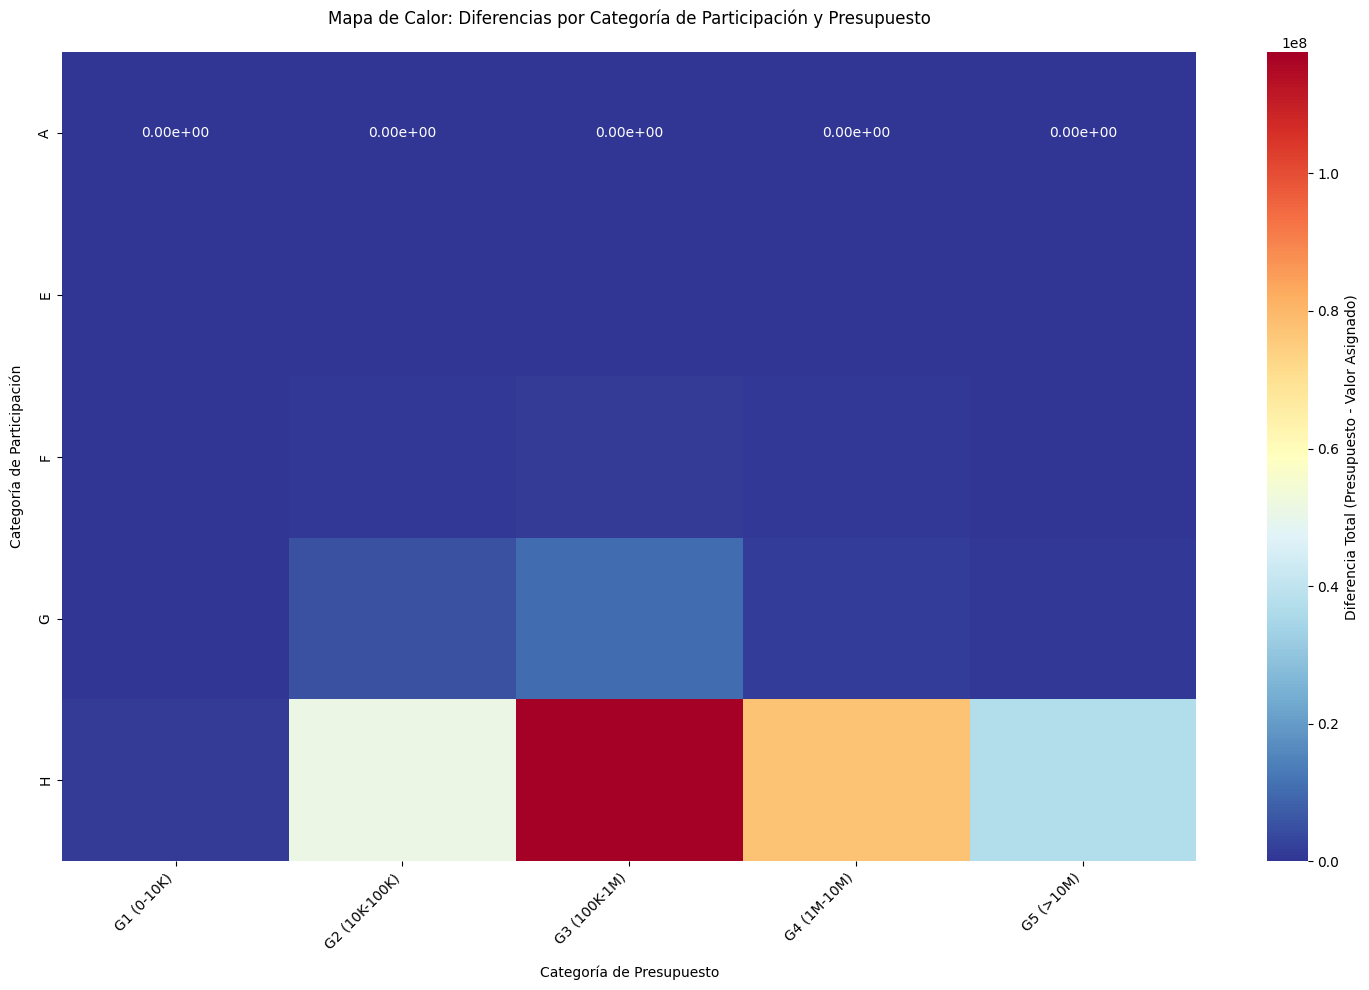


DISTRIBUCIÓN DE CASOS POR CATEGORÍA:
categoria_presupuesto    G1 (0-10K)  G2 (10K-100K)  G3 (100K-1M)  G4 (1M-10M)  \
categoria_participacion                                                         
A                             86085             18             0            0   
E                             14093              4             0            0   
F                             38829            803            61            3   
G                             26093           2385           529           29   
H                             22077          21095          6328          589   
All                          187177          24305          6918          621   

categoria_presupuesto    G5 (>10M)     All  
categoria_participacion                     
A                                0   86103  
E                                0   14097  
F                                0   39696  
G                                4   29040  
H                               26   50115 

In [39]:
# 1. Asegurarnos que las columnas numéricas estén en el formato correcto
df_2020['Presupuesto'] = pd.to_numeric(df_2020['Presupuesto'], errors='coerce')
df_2020['Valor adjudicado'] = pd.to_numeric(df_2020['Valor adjudicado'], errors='coerce')

# 2. Calcular participaciones por proveedor
participaciones = df_2020['Nombre Proveedor'].value_counts()

# 3. Función para asignar categoría de participación
def asignar_categoria_participacion(participaciones):
    if participaciones > 50000: return 'A'
    elif participaciones > 40000: return 'B'
    elif participaciones > 30000: return 'C'
    elif participaciones > 20000: return 'D'
    elif participaciones > 10000: return 'E'
    elif participaciones > 1000: return 'F'
    elif participaciones > 100: return 'G'
    else: return 'H'

# 4. Función para asignar categoría de presupuesto
def asignar_categoria_presupuesto(presupuesto):
    if 0 < presupuesto < 10000:
        return 'G1 (0-10K)'
    elif 10000 <= presupuesto < 100000:
        return 'G2 (10K-100K)'
    elif 100000 <= presupuesto < 1000000:
        return 'G3 (100K-1M)'
    elif 1000000 <= presupuesto < 10000000:
        return 'G4 (1M-10M)'
    elif presupuesto >= 10000000:
        return 'G5 (>10M)'
    else:
        return 'Sin Categoría'

# 5. Preparar DataFrame para análisis
df_heatmap = df_2020.copy()
df_heatmap['num_participaciones'] = df_heatmap['Nombre Proveedor'].map(participaciones)
df_heatmap['categoria_participacion'] = df_heatmap['num_participaciones'].apply(asignar_categoria_participacion)
df_heatmap['categoria_presupuesto'] = df_heatmap['Presupuesto'].apply(asignar_categoria_presupuesto)

# 6. Calcular diferencias
df_heatmap['diferencia_absoluta'] = df_heatmap['Presupuesto'] - df_heatmap['Valor adjudicado']
df_heatmap['diferencia_porcentual'] = (df_heatmap['diferencia_absoluta'] / df_heatmap['Presupuesto']) * 100

# 7. Eliminar casos 'Sin Categoría' y valores nulos
df_heatmap = df_heatmap[df_heatmap['categoria_presupuesto'] != 'Sin Categoría']
df_heatmap = df_heatmap.dropna(subset=['diferencia_absoluta', 'diferencia_porcentual'])

# 8. Crear matriz de correlación
matriz_diferencias = pd.pivot_table(
    df_heatmap,
    values='diferencia_absoluta',
    index='categoria_participacion',
    columns='categoria_presupuesto',
    aggfunc='sum',
    fill_value=0
)

# 9. Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_diferencias, 
            annot=True,
            fmt='.2e',
            cmap='RdYlBu_r',
            cbar_kws={'label': 'Diferencia Total (Presupuesto - Valor Asignado)'}
)

plt.title('Mapa de Calor: Diferencias por Categoría de Participación y Presupuesto', pad=20)
plt.xlabel('Categoría de Presupuesto', labelpad=10)
plt.ylabel('Categoría de Participación', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10. Mostrar estadísticas
print("\nDISTRIBUCIÓN DE CASOS POR CATEGORÍA:")
print("=" * 80)
distribucion = pd.crosstab(
    df_heatmap['categoria_participacion'],
    df_heatmap['categoria_presupuesto'],
    margins=True
)
print(distribucion)

# 11. Estadísticas por categoría
print("\nESTADÍSTICAS POR CATEGORÍA DE PRESUPUESTO:")
print("=" * 80)
stats = df_heatmap.groupby('categoria_presupuesto').agg({
    'Presupuesto': ['count', 'mean', 'sum'],
    'diferencia_absoluta': ['mean', 'sum'],
    'diferencia_porcentual': 'mean'
}).round(2)
print(stats)

# 12. Mostrar leyenda
print("\nLEYENDA DE CATEGORÍAS:")
print("=" * 80)
print("\nCategorías de Presupuesto:")
print("G1: 0 < Presupuesto < $10,000")
print("G2: $10,000 ≤ Presupuesto < $100,000")
print("G3: $100,000 ≤ Presupuesto < $1,000,000")
print("G4: $1,000,000 ≤ Presupuesto < $10,000,000")
print("G5: Presupuesto ≥ $10,000,000")